In [2]:
pip install ipython-sql psycopg2

     ---------------------------------------- 1.2/1.2 MB 33.8 kB/s eta 0:00:00
  Using cached sqlparse-0.4.4-py3-none-any.whl (41 kB)
     ---------------------------------------- 2.1/2.1 MB 50.8 kB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.4.39
    Uninstalling SQLAlchemy-1.4.39:
      Successfully uninstalled SQLAlchemy-1.4.39
Note: you may need to restart the kernel to use updated packages.


In [1]:
%load_ext sql

In [44]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
import psycopg2
from sqlalchemy import create_engine, MetaData, Table

# PostgreSQL credentials
username = 'postgres'
password = 'Exitroz90@'
hostname = 'localhost'
port = '5432'  # Default PostgreSQL port
dbname = 'Project3'

# Create a connection string
conn_string = f"postgresql+psycopg2://{username}:{password}@{hostname}:{port}/{dbname}"

# 1. Connect using psycopg2 for low-level operations
conn = psycopg2.connect(user=username, password=password, host=hostname, port=port, database=dbname)

# 2. Execute a query using psycopg2
cursor = conn.cursor()
cursor.execute("SELECT * FROM ElectricVehicles;")
data = cursor.fetchall()
print(data)

# 3. Close the cursor and connection
cursor.close()
conn.close()

# # 4. Connect using SQLAlchemy for high-level operations
# engine = create_engine(conn_string)

# # 5. Execute a query using SQLAlchemy
# with engine.connect() as connection:
#     result = connection.execute("SELECT * FROM your_table;")
#     data = result.fetchall()
#     print(data)

# # 6. Using SQLAlchemy for ORM
# metadata = MetaData()
# your_table = Table('your_table', metadata, autoload_with=engine)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [29]:
columns = [desc[0] for desc in cursor.description]
df = pd.DataFrame(data, columns=columns)

# 5. Print the DataFrame
df.head()

,vin,county,city,state,postal_code,modelyear,make,model,electric_vehicletype,cafv_eligibility,electric_range,basemsrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,census_tract_2020
0,3C3CFFGE4E,Yakima,Yakima,WA,98902,2014,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,87,0,14.0,1593721,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10
1,5YJXCBE40H,Thurston,Olympia,WA,98513,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,2.0,257167501,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
2,3MW39FS03P,King,Renton,WA,98058,2023,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,11.0,224071816,POINT (-122.1298876 47.4451257),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,7PDSGABA8P,Snohomish,Bothell,WA,98012,2023,RIVIAN,R1S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,21.0,260084653,POINT (-122.1873 47.820245),PUGET SOUND ENERGY INC,5.306105e+10
4,5YJ3E1EB8L,King,Kent,WA,98031,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,33.0,253771913,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [30]:
df.isnull().sum()

vin                       0
county                    5
city                      5
state                     0
postal_code               5
modelyear                 0
make                      0
model                     0
electric_vehicletype      0
cafv_eligibility          0
electric_range            0
basemsrp                  0
legislative_district    360
dol_vehicle_id            0
vehicle_location         10
electric_utility          5
census_tract_2020         5
dtype: int64

In [31]:
df.dropna(inplace=True)

In [32]:
df.isnull().sum()

vin                     0
county                  0
city                    0
state                   0
postal_code             0
modelyear               0
make                    0
model                   0
electric_vehicletype    0
cafv_eligibility        0
electric_range          0
basemsrp                0
legislative_district    0
dol_vehicle_id          0
vehicle_location        0
electric_utility        0
census_tract_2020       0
dtype: int64

In [33]:
df.shape

(166435, 17)

In [35]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Display duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [vin, county, city, state, postal_code, modelyear, make, model, electric_vehicletype, cafv_eligibility, electric_range, basemsrp, legislative_district, dol_vehicle_id, vehicle_location, electric_utility, census_tract_2020]
Index: []


In [37]:
#check for data types
df.dtypes

vin                      object
county                   object
city                     object
state                    object
postal_code              object
modelyear                 int64
make                     object
model                    object
electric_vehicletype     object
cafv_eligibility         object
electric_range            int64
basemsrp                  int64
legislative_district    float64
dol_vehicle_id            int64
vehicle_location         object
electric_utility         object
census_tract_2020       float64
dtype: object

In [40]:
# Extract latitude and longitude from the 'Vehicle Location' column
df[['Latitude', 'Longitude']] = df['vehicle_location'].str.extract(r'POINT \((-?\d+\.\d+) (-?\d+\.\d+)\)')
df[['Latitude', 'Longitude']] = df[['Latitude', 'Longitude']].astype(float)


In [41]:
df.head()

,vin,county,city,state,postal_code,modelyear,make,model,electric_vehicletype,cafv_eligibility,electric_range,basemsrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,census_tract_2020,Latitude,Longitude
0,3C3CFFGE4E,Yakima,Yakima,WA,98902,2014,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,87,0,14.0,1593721,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10,-120.524012,46.597394
1,5YJXCBE40H,Thurston,Olympia,WA,98513,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,2.0,257167501,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10,-122.817545,46.988760
2,3MW39FS03P,King,Renton,WA,98058,2023,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,11.0,224071816,POINT (-122.1298876 47.4451257),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,-122.129888,47.445126
3,7PDSGABA8P,Snohomish,Bothell,WA,98012,2023,RIVIAN,R1S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,21.0,260084653,POINT (-122.1873 47.820245),PUGET SOUND ENERGY INC,5.306105e+10,-122.187300,47.820245
4,5YJ3E1EB8L,King,Kent,WA,98031,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,33.0,253771913,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,-122.201252,47.393181


In [42]:
column = ['vehicle_location']
df.drop(columns=column)

,vin,county,city,state,postal_code,modelyear,make,model,electric_vehicletype,cafv_eligibility,electric_range,basemsrp,legislative_district,dol_vehicle_id,electric_utility,census_tract_2020,Latitude,Longitude
0,3C3CFFGE4E,Yakima,Yakima,WA,98902,2014,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,87,0,14.0,1593721,PACIFICORP,5.307700e+10,-120.524012,46.597394
1,5YJXCBE40H,Thurston,Olympia,WA,98513,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,2.0,257167501,PUGET SOUND ENERGY INC,5.306701e+10,-122.817545,46.988760
2,3MW39FS03P,King,Renton,WA,98058,2023,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,11.0,224071816,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,-122.129888,47.445126
3,7PDSGABA8P,Snohomish,Bothell,WA,98012,2023,RIVIAN,R1S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,21.0,260084653,PUGET SOUND ENERGY INC,5.306105e+10,-122.187300,47.820245
4,5YJ3E1EB8L,King,Kent,WA,98031,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,33.0,253771913,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,-122.201252,47.393181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166795,3FA6P0SU4D,Spokane,Spokane,WA,99223,2013,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,6.0,239527123,BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306300e+10,-117.369705,47.626370
166796,5YJYGDEE5M,King,Sammamish,WA,98074,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,45.0,148715479,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,-122.031327,47.628578
166797,7SAYGDEE5N,Snohomish,Mukilteo,WA,98275,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,21.0,220504406,PUGET SOUND ENERGY INC,5.306104e+10,-122.299965,47.941710
166798,1G1RH6E43D,Lewis,Mossyrock,WA,98564,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,20.0,156418475,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.304197e+10,-122.487535,46.529013


In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
modelyear,166435.0,2.020344e+03,3.001137e+00,1.997000e+03,2.018000e+03,2.021000e+03,2.023000e+03,2.024000e+03
electric_range,166435.0,6.149686e+01,9.327022e+01,0.000000e+00,0.000000e+00,0.000000e+00,8.400000e+01,3.370000e+02
basemsrp,166435.0,1.149907e+03,8.648905e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.450000e+05
legislative_district,166435.0,2.917925e+01,1.485365e+01,1.000000e+00,1.800000e+01,3.300000e+01,4.200000e+01,4.900000e+01
dol_vehicle_id,166435.0,2.172652e+08,7.727789e+07,4.385000e+03,1.790872e+08,2.244239e+08,2.513457e+08,4.792548e+08
census_tract_2020,166435.0,5.303982e+10,1.623324e+07,5.300195e+10,5.303301e+10,5.303303e+10,5.305307e+10,5.307794e+10
Latitude,166435.0,-1.220851e+02,1.020187e+00,-1.246251e+02,-1.223942e+02,-1.222918e+02,-1.221517e+02,-1.170444e+02
Longitude,166435.0,4.746534e+01,6.134015e-01,4.558359e+01,4.735798e+01,4.761037e+01,4.771558e+01,4.899634e+01


    modelyear  Counts
0        1997       1
1        1998       1
2        1999       3
3        2000       7
4        2002       2
5        2003       1
6        2008      19
7        2010      23
8        2011     782
9        2012    1626
10       2013    4443
11       2014    3525
12       2015    4816
13       2016    5501
14       2017    8495
15       2018   14117
16       2019   10837
17       2020   11400
18       2021   18705
19       2022   27526
20       2023   51300
21       2024    3305


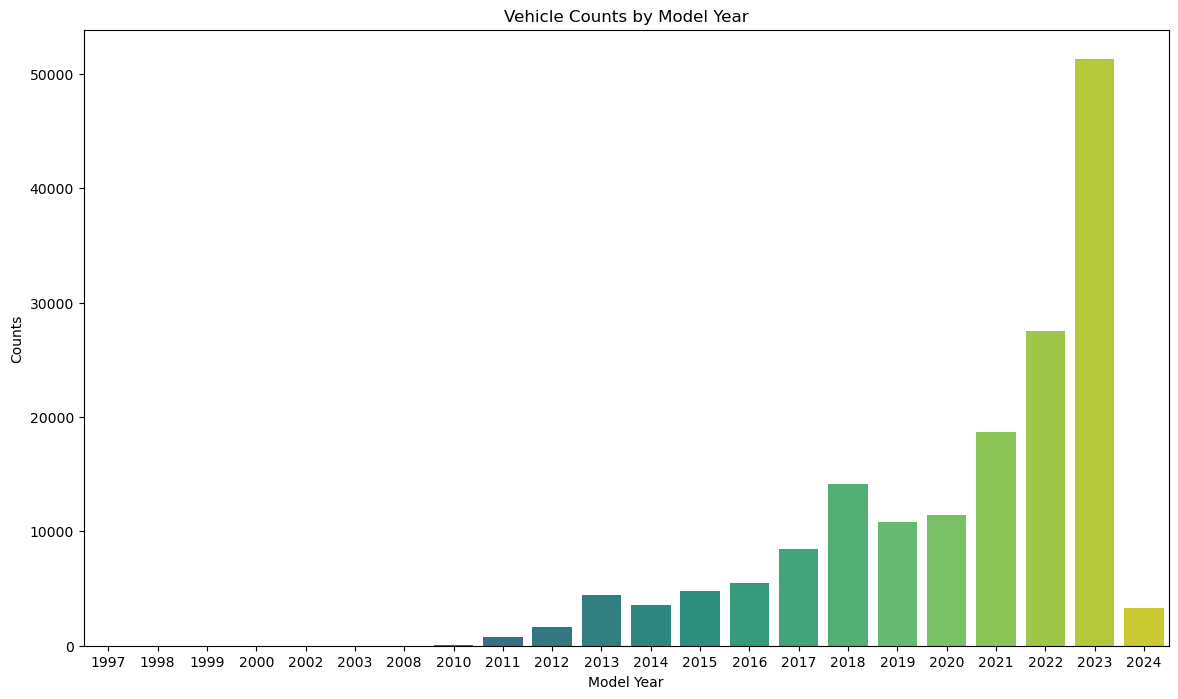

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Model Year' and count occurrences
grouped_data = df.groupby('modelyear').size().reset_index(name='Counts')
print(grouped_data)


# Plot the data
plt.figure(figsize=(14, 8))
sns.barplot(x='modelyear', y='Counts', data=grouped_data, palette='viridis')
plt.title('Vehicle Counts by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Counts')
plt.show()


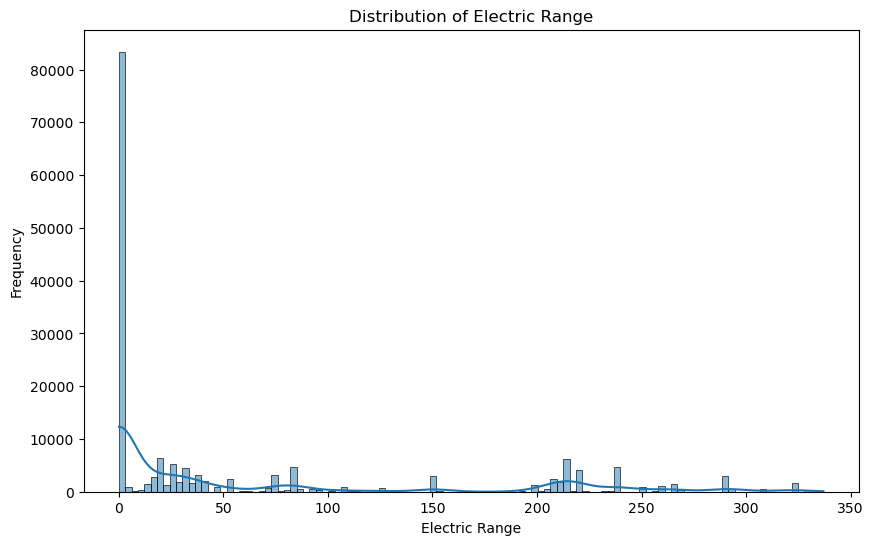

In [49]:

# Distribution plot for Electric Range
plt.figure(figsize=(10, 6))
sns.histplot(df['electric_range'], kde=True)
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range')
plt.ylabel('Frequency')
plt.show()


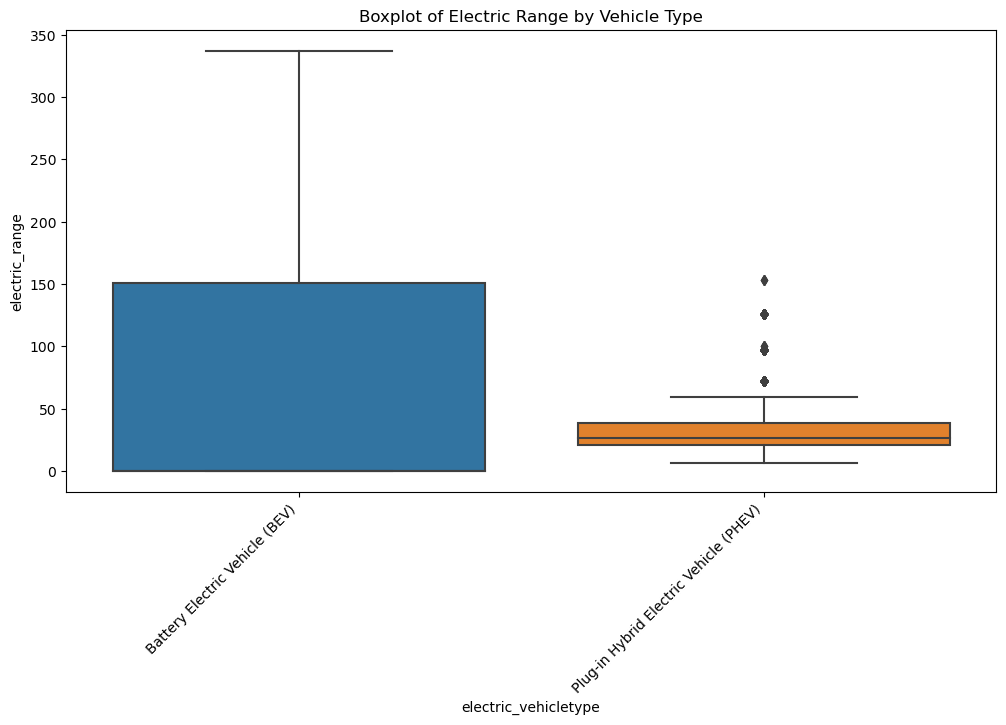

In [50]:
# Boxplot for Electric Vehicle Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='electric_vehicletype', y='electric_range', data=df)
plt.title('Boxplot of Electric Range by Vehicle Type')
plt.xticks(rotation=45, ha='right')
plt.show()


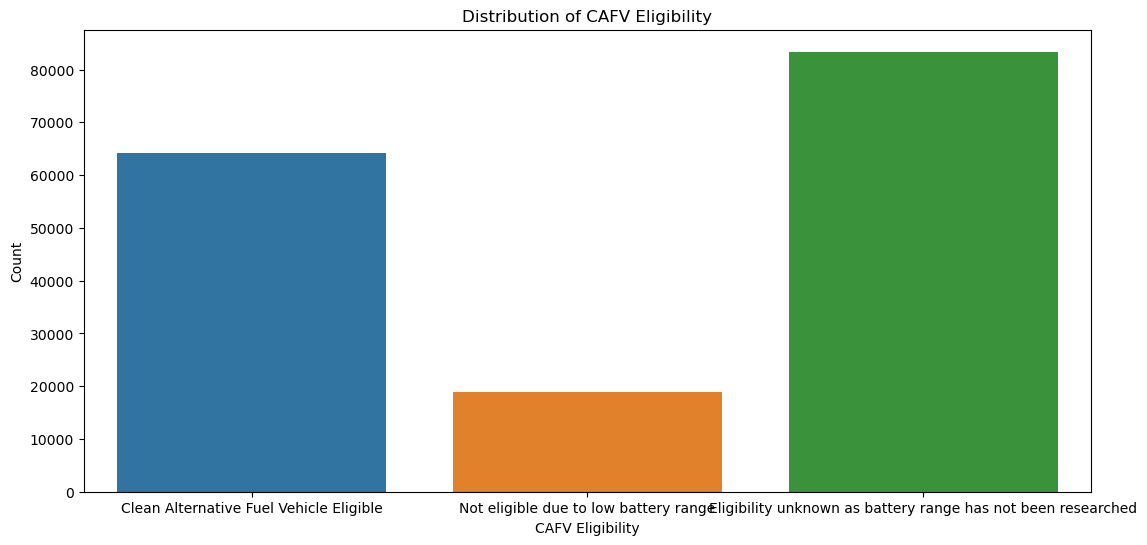

In [52]:
plt.figure(figsize=(13, 6))
sns.countplot(x='cafv_eligibility', data=df)
plt.title('Distribution of CAFV Eligibility')
plt.xlabel('CAFV Eligibility')
plt.ylabel('Count')
plt.show()


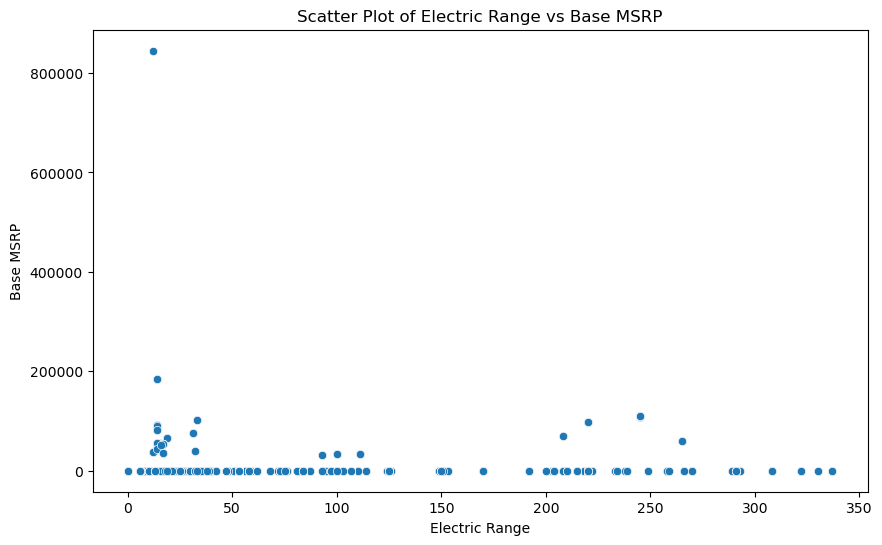

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='electric_range', y='basemsrp', data=df)
plt.title('Scatter Plot of Electric Range vs Base MSRP')
plt.xlabel('Electric Range')
plt.ylabel('Base MSRP')
plt.show()


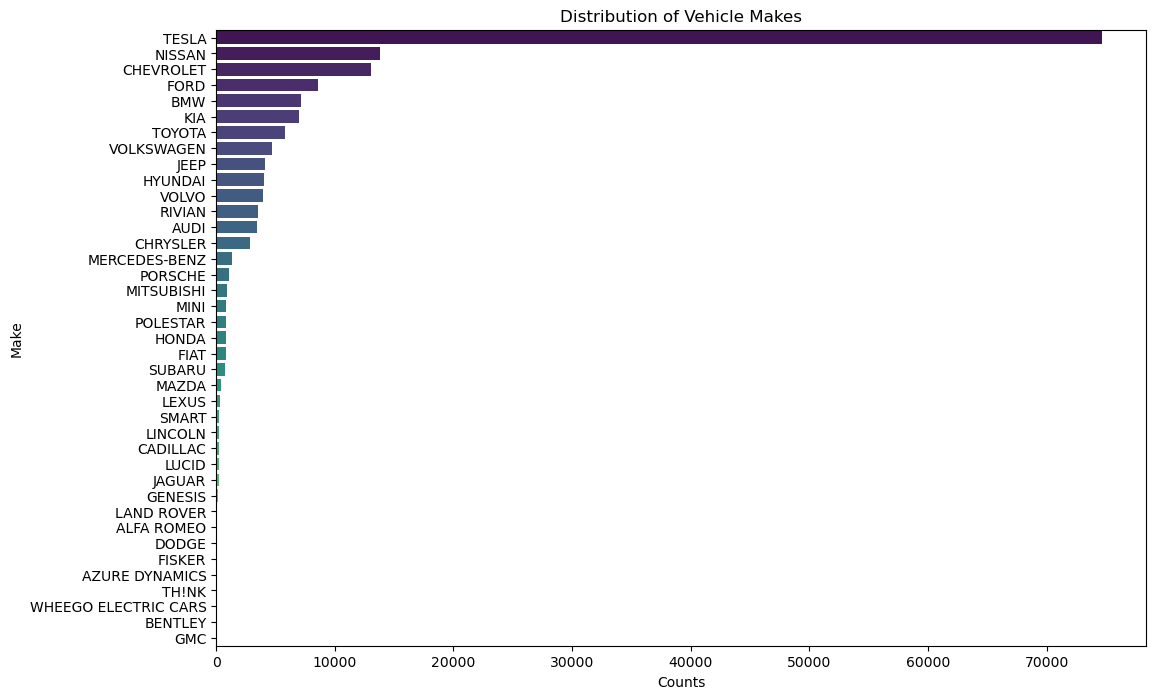

In [54]:
# Plot the distribution of 'Make'
plt.figure(figsize=(12, 8))
sns.countplot(y='make', data=df, order=df['make'].value_counts().index, palette='viridis')
plt.title('Distribution of Vehicle Makes')
plt.xlabel('Counts')
plt.ylabel('Make')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_13944\74572113.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)


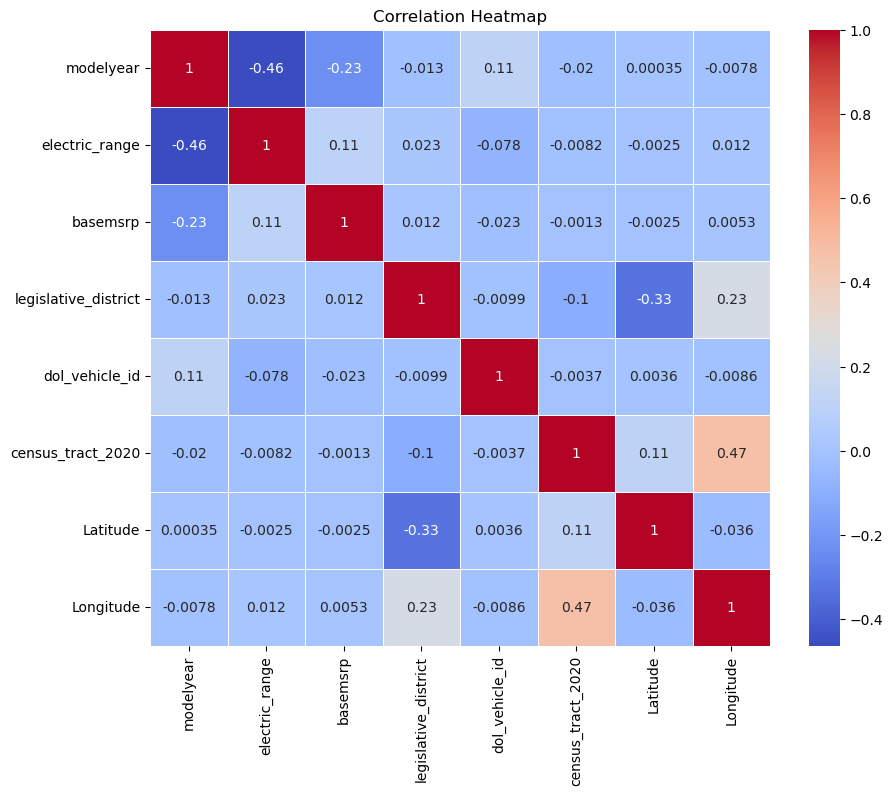

In [55]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()
